<a href="https://colab.research.google.com/github/prajwal467/CE888/blob/main/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from scipy import signal
from scipy.signal import find_peaks
import pywt

In [33]:
df = pd.read_excel('Datap.xlsx')

In [37]:
df = df.iloc[1: , :]



In [39]:
df.rename(columns = {'Unnamed: 0':'Timedate', 'Unnamed: 1':'COWID'}, inplace = True)


In [40]:
df.head(10)

,Timedate,COWID,CH4,NH3,C2H2,CH2O
2,2020-11-13 10:11:51.036000,600,9.822169,2967.5886,5.221716,2.454012
3,2020-11-13 10:11:53.701000,600,15.897066,6410.5781,5.616248,3.068213
4,2020-11-13 10:11:56.767000,600,14.930588,5767.1919,5.538184,2.938843
5,2020-11-13 10:11:59.752000,600,15.445284,5852.3682,5.680538,3.000599
6,2020-11-13 10:12:02.752000,600,13.313373,6028.2261,6.196723,3.068459
7,2020-11-13 10:12:05.752000,600,11.205954,5910.2944,6.198974,3.030338
8,2020-11-13 10:12:08.752000,600,13.788208,5890.5952,6.287739,3.070464
9,2020-11-13 10:12:11.752000,600,16.691484,5860.2988,6.093232,2.968701
10,2020-11-13 10:12:14.752000,600,13.897832,5820.0356,6.055994,2.937313
11,2020-11-13 10:12:17.752000,600,11.198291,6118.3384,6.403226,3.025893


Text(0, 0.5, 'MW Energy Consumption')

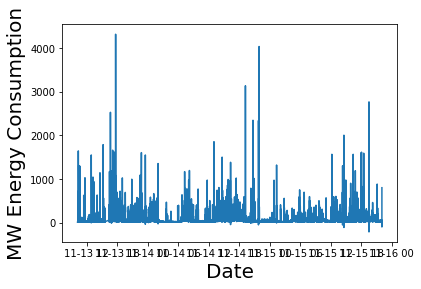

In [44]:
y = np.array(df.CH4)
x = df.index
date_array = pd.to_datetime(df.Timedate)
plt.plot(date_array,y)
plt.xlabel('Date',fontsize=20)
plt.ylabel('MW Energy Consumption',fontsize=20)


Text(0, 0.5, 'Temperature')

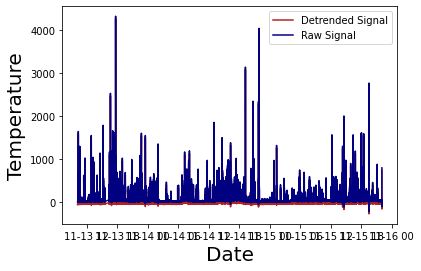

In [45]:
y_detrend = signal.detrend(y)
plt.plot(date_array, y_detrend,color='firebrick',label='Detrended Signal')
plt.plot(date_array,y, color='navy',label='Raw Signal')
plt.legend()
plt.xlabel('Date',fontsize=20)
plt.ylabel('Temperature',fontsize=20)

(0.0, 200.0)

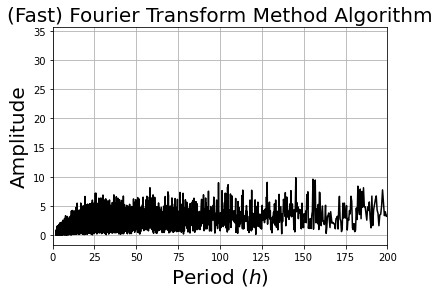

In [46]:
FFT =np.fft.fft(y_detrend)
new_N=int(len(FFT)/2) 
f_nat=1
new_X = np.linspace(10**-12, f_nat/2, new_N, endpoint=True)
new_Xph=1.0/(new_X)
FFT_abs=np.abs(FFT)
plt.plot(new_Xph,2*FFT_abs[0:int(len(FFT)/2.)]/len(new_Xph),color='black')
plt.xlabel('Period ($h$)',fontsize=20)
plt.ylabel('Amplitude',fontsize=20)
plt.title('(Fast) Fourier Transform Method Algorithm',fontsize=20)
plt.grid(True)
plt.xlim(0,200)

In [47]:
fft_abs = 2*FFT_abs[0:int(len(FFT)/2.)]/len(new_Xph)
fft_abs = pd.DataFrame(fft_abs, columns = ['Amplitude'])
fft_sorted = fft_abs.sort_values(by='Amplitude',ascending=False).head(20)
fft_sorted

,Amplitude
3,33.954248
5,30.971092
8,24.816368
2,23.358399
12,20.529549
7,20.415486
17,17.869354
69,16.735672
47,14.439911
60,14.275276


In [48]:
fft_sorted.index/24


Float64Index([              0.125, 0.20833333333333334,  0.3333333333333333,
              0.08333333333333333,                 0.5,  0.2916666666666667,
               0.7083333333333334,               2.875,  1.9583333333333333,
                              2.5,                 7.5,               0.375,
                            9.125,  2.4166666666666665,   4.041666666666667,
               11.583333333333334,              11.625,  12.833333333333334,
               3.5416666666666665,               1.125],
             dtype='float64')

In [49]:
#Defining the filtering function
def fft_filter(th):
    fft_tof=FFT.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof

In [50]:
#Showing the plots at different thresholds values
#Defining the amplitude filtering function
def fft_filter_amp(th):
    fft_tof=FFT.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof_abs[fft_tof_abs<=th]=0
    return fft_tof_abs[0:int(len(fft_tof_abs)/2.)]

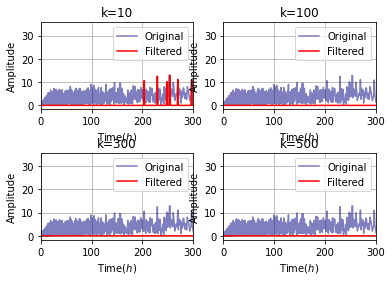

In [59]:
K_plot=[10,100,300,500]
j=0
for k in K_plot:
    j=j+1
    plt.subplot(2,2,j)
    plt.title('k=%i'%(k))
    plt.xlim(0,300)
    plt.plot(new_Xph,2*FFT_abs[0:int(len(FFT)/2.)]/len(new_Xph),color='navy',alpha=0.5,label='Original')
    plt.grid(True)
    plt.plot(new_Xph,fft_filter_amp(k),'red',label='Filtered')
    plt.xlabel('Time($h$)')
    plt.ylabel('Amplitude')
    plt.legend()
plt.subplots_adjust(hspace=0.5)

In [52]:
def fft_filter(perc):
    th=perc*(2*FFT_abs[0:int(len(FFT)/2.)]/len(new_Xph)).max()
    fft_tof=FFT.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof

NameError: ignored

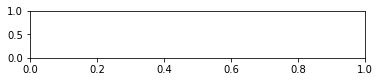

In [53]:
#Showing some plots at different threshold values
K_plot_values=[0.0,0.30,0.60,0.95]
j=0
for k in K_plot_values:
    j+=1
    plt.subplot(4,1,j)
    plt.plot(x,np.fft.ifft(fft_filter(k)),color=colors[j])
    plt.title('k=%.2f of the maximum' %(k))
    plt.xlabel('Time (Datapoint)')
    plt.ylabel('Load')
plt.subplots_adjust(hspace=0.8)

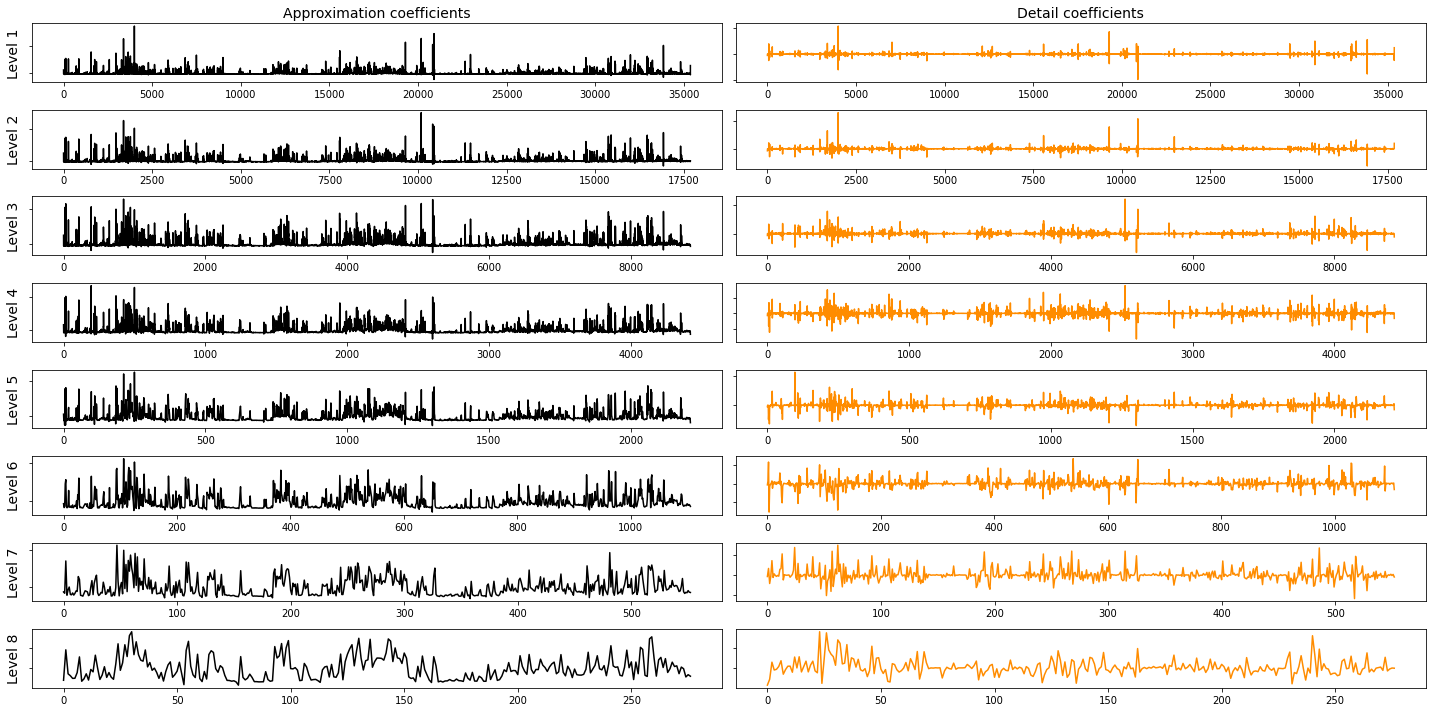

In [54]:
time=x.max()
sample_rate=1/900.
size= int(sample_rate*time)
t = np.linspace(0, time, num=size)
dataset = y_detrend
waveletname = 'sym2'
levels=8
fig, axarr = plt.subplots(nrows=levels, ncols=2, figsize=(20,10))
COEFF_D=[]
DATASET=[]
k=1
for ii in range(levels):
    (dataset, coeff_d) = pywt.dwt(dataset, waveletname,mode='per')
    axarr[ii, 0].plot(dataset, 'black')
    axarr[ii, 1].plot(coeff_d, 'darkorange')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
    #print(len(coeff_d))
    COEFF_D.append(np.repeat(coeff_d,2**k))
    DATASET.append(np.repeat(dataset,2**k))
    k=k+1
plt.tight_layout()
plt.show()